## 目录

- 感知机分类器
- 逻辑回归分类器
- 图像分类数据集
- softmax回归的从零开始实现
- softmax回归的简洁实现

## 感知机分类器

Perceptron是一个线性分类器。它的工作方式与没有隐藏层的神经网络相同（只有输入和输出）。

![perceptron](perceptron.png)

首先，它对给定的数据集进行权重训练，然后通过网络对一个新项目进行分类。

> 注意，在分类问题中，每个节点代表一个类别。最终的分类是具有最大输出值的类/节点。

### 实现

`PerceptionLinearLearner` 用于训练（计算）给定数据集的权重。

函数`predict`用于对一个新的项目进行分类：该函数计算项目与外层每个节点的计算权重的（代数）点积。然后，它选择一个最大的值，将项目归入相应的类别。

In [2]:
import sys
sys.path.insert(1, '../')
from utils.dataset4learners import *
from LinearClassifier_3 import *

psource(PerceptionLinearLearner)

#### 实现要点

```py
def learn(self, learning_rate, epochs):
    """ learning loop """
    def loss(example, w, idx_i, idx_t):
        """ error: difference between estimation and true value """
        x = example的齐次坐标表示
        y = w * x，即预测值
        t = 真实值
        return y - t

    def update(w, learning_rate, err, X_col, num_examples):
        """ update weights """
        遍历w[i]:
            w[i] = w[i] - 学习率 * 误差值 * 自变量X[i] / 样本数量)

    def homogeneous(num_examples):
        """ build homogeneous coordinates """
        return 齐次坐标表示

    X_col = 齐次坐标表示
    for epoch in range(epochs):
        err = []
        # pass over all examples
        for example in self.examples:
            err.append(loss(example, w, idx_i, idx_t))

        # update weights
        update(w, 学习率, err, X_col, 样本数量)
```

> 注意，Perceptron是一个单层的神经网络，在后面课程中讲授。

### 例子

我们将在`iris`数据集上训练感知机。

尽管`BackPropagationLearner`使用的是整数索引而不是字符串，我们需要将类名转换成整数。

```py
iris = DataSet(name="iris")
iris.classes_to_numbers()

perceptron = PerceptionLinearLearner(iris)
print(perceptron.predict([5, 3, 1, 0.1]))
```

正确的输出是0，这意味着该物品属于第一类，"setosa"。注意Perceptron算法并不完美，可能会产生错误的分类。

## 逻辑回归分类器

逻辑回归将感知机采用的硬性阈值函数改为柔性阈值，可以更好地对分界区域的不确定性建模。

### 实现


In [3]:
psource(LogisticLinearLeaner)

#### 实现要点

```py
def learn(self, learning_rate, epochs):
    """ learning loop """
    def loss(example, w, idx_i, idx_t, h):
        """ error: difference between estimation and true value """
        x = example的齐次坐标表示
        y = Sigmoid(w * x)，即预测值
        h.append(Sigmoid().derivative(y))：收集梯度值
        t = 真实值
        return y - t

    def update(w, learning_rate, err, h, X_col, num_examples):
        """ update weights """
        遍历w[i]:
            w[i] = w[i] - 学习率 * 误差值err[i] * 梯度值h[i] / 样本数量)

    def homogeneous(num_examples):
        """ build homogeneous coordinates """
        同感知机

    同感知机
```

该算法首先为输入变量分配一些随机权重，然后根据计算的误差更新每个变量的权重。最后用更新后的权重进行预测。

```py
iris = DataSet(name="iris")
iris.classes_to_numbers()

logisticer = LogisticLinearLeaner(iris)
print(logisticer.predict([5, 3, 1, 0.1]))
```

## 图像分类数据集

MNIST数据集是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。

我们将使用类似但更复杂的Fashion-MNIST数据集

In [6]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中

In [8]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

len(mnist_train), len(mnist_test)

100.0%


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [9]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

两个可视化数据集的函数

In [10]:
def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())  # 图片张量
        else:
            ax.imshow(img)  # PIL图片
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

几个样本的图像及其相应的标签

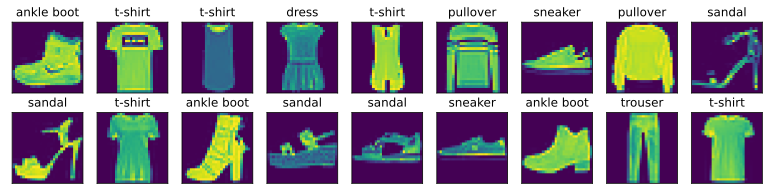

In [11]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

读取一小批量数据，大小为`batch_size`

In [12]:
batch_size = 256

def get_dataloader_workers():  
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'20.21 sec'

定义`load_data_fashion_mnist`函数

In [13]:
def load_data_fashion_mnist(batch_size, resize=None):  
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [14]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## softmax回归的从零开始实现

就像我们从零开始实现线性回归一样，你应该知道实现softmax回归的细节

In [15]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

将展平每个图像，把它们看作长度为784的向量。
因为我们的数据集有10个类别，所以网络输出维度为10

In [16]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

给定一个矩阵`X`，我们可以对所有元素求和

In [17]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

实现softmax

$$
\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.
$$

In [18]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition # 广播机制

我们将每个元素变成一个非负数。
此外，依据概率原理，每行总和为1

In [19]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.3532, 0.0347, 0.0805, 0.0395, 0.4921],
         [0.6108, 0.0814, 0.1468, 0.0484, 0.1126]]),
 tensor([1., 1.]))

实现softmax回归模型

In [20]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

创建一个数据样本`y_hat`，其中包含2个样本在3个类别的预测概率，
以及它们对应的标签`y`。
使用`y`作为`y_hat`中概率的索引

In [21]:
y = torch.tensor([0, 2]) # 在第二个样本中，第三类是正确的预测
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y] # 使用y作为y_hat中概率的索引

tensor([0.1000, 0.5000])

实现交叉熵损失函数

In [22]:
def cross_entropy(y_hat, y):
    """ 避免低效的for循环 """
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y) # 损失函数，越低越好

tensor([2.3026, 0.6931])

将预测类别与真实`y`元素进行比较

In [23]:
def accuracy(y_hat, y):  
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y # 数据类型转成一致
    return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

0.5

我们可以评估在任意模型`net`的精度

In [24]:
def evaluate_accuracy(net, data_iter):  
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

`Accumulator`实例中创建了2个变量，
分别用于存储正确预测的数量和预测的总数量

In [25]:
class Accumulator:  
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

evaluate_accuracy(net, test_iter) # 随机权重初始化，随机猜测应该接近0.1

0.1004

Softmax回归的训练

In [26]:
def train_epoch_ch3(net, train_iter, loss, updater):  
    """训练模型一个迭代周期（定义见第3章）"""
    if isinstance(net, torch.nn.Module):
        net.train()  # 将模型设置为训练模式
    metric = Accumulator(3)  # 训练损失总和、训练准确度总和、样本数
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:  # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

定义一个在动画中绘制数据的实用程序类

In [27]:
class Animator:  
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        if legend is None:
            legend = [] # 增量地绘制多条线
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

训练函数

In [28]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

小批量随机梯度下降来优化模型的损失函数

In [29]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

训练模型10个迭代周期

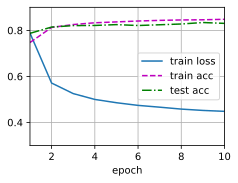

In [30]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

对图像进行分类预测

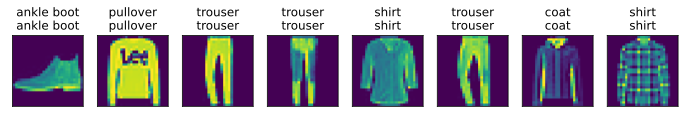

In [31]:
def predict_ch3(net, test_iter, n=8):  
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

## softmax回归的简洁实现

通过深度学习框架的高级API能够使实现softmax回归变得更加容易

In [32]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

Softmax回归的输出层是一个全连接层

In [33]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

在交叉熵损失函数中传递未规范化的预测，并同时计算softmax及其对数

In [34]:
loss = nn.CrossEntropyLoss(reduction='none')

使用学习率为0.1的小批量随机梯度下降作为优化算法

In [35]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

调用
之前
定义的训练函数来训练模型

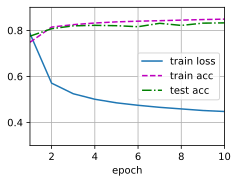

In [36]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)